In [1]:
# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import shap

# System and Random Utilities
import os
import random

# # Time-Series Analysis Libraries
# from pylab import rcParams
# import statsmodels.api as sm
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Machine Learning Libraries
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import lightgbm as lgb

# # Deep Learning Libraries
# import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout

ModuleNotFoundError: No module named 'seaborn'

In [3]:
# Set the seed for reproducibility
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Set seed for random module
random.seed(seed_value)

# Set seed for numpy module
np.random.seed(seed_value)

# # Set seed for TensorFlow
# tf.random.set_seed(seed_value)

In [4]:
df = pd.read_csv('../datasets/train.csv')
print(df.shape)
df.head()

(913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
print(df['store'].unique())
print(df['item'].unique())

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [6]:
df['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

In [7]:
df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df['weekday'] = df['date'].dt.day_name()
df

,date,store,item,sales,day,month,year,weekday
0,2013-01-01,1,1,13,1,1,2013,Tuesday
1,2013-01-02,1,1,11,2,1,2013,Wednesday
2,2013-01-03,1,1,14,3,1,2013,Thursday
3,2013-01-04,1,1,13,4,1,2013,Friday
4,2013-01-05,1,1,10,5,1,2013,Saturday
...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,27,12,2017,Wednesday
912996,2017-12-28,10,50,59,28,12,2017,Thursday
912997,2017-12-29,10,50,74,29,12,2017,Friday
912998,2017-12-30,10,50,62,30,12,2017,Saturday


In [7]:
for weekday in df['weekday'].unique():
    df_week = df[df['weekday']==weekday]
    print(weekday, df_week['sales'].sum())

Tuesday 6293481
Wednesday 6312090
Thursday 6749880
Friday 7198021
Saturday 7655482
Sunday 8109705
Monday 5385853


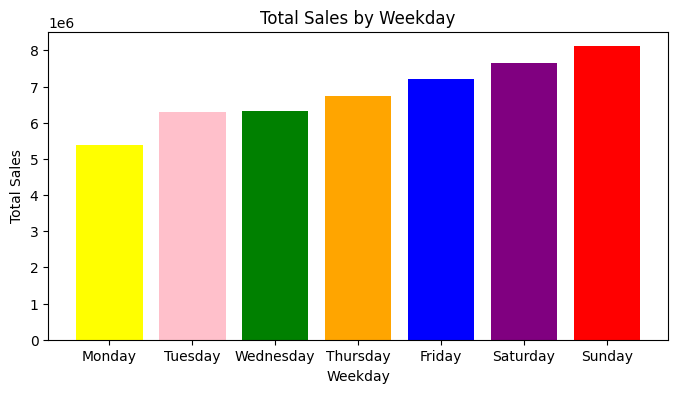

In [31]:
# Set 'weekday' column as categorical with a specific order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)

# Group by weekday and calculate total sales for each weekday
sales_by_weekday = df.groupby('weekday')['sales'].sum().reset_index()

# Create a custom color map for each weekday
weekday_colors = {
    'Monday': 'yellow',
    'Tuesday': 'pink',
    'Wednesday': 'green',
    'Thursday': 'orange',
    'Friday': 'blue',
    'Saturday': 'purple',
    'Sunday': 'red'
}

# Plot the bar chart with custom colors
plt.figure(figsize=(8, 4))
for weekday, color in weekday_colors.items():
    sales = sales_by_weekday.loc[sales_by_weekday['weekday'] == weekday, 'sales'].iloc[0]
    plt.bar(weekday, sales, color=color)

plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.show()

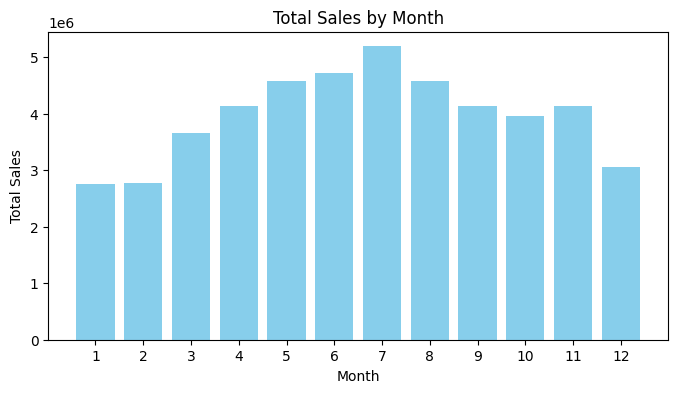

In [32]:
# Group by month and calculate total sales for each month
sales_by_month = df.groupby('month')['sales'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 4))
plt.bar(sales_by_month['month'], sales_by_month['sales'], color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))  # Set x-axis ticks to show all months (1 to 12)
plt.show()

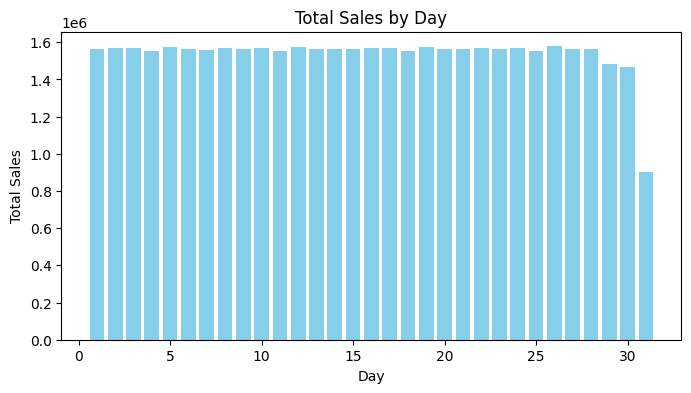

In [33]:
# Group by day and calculate total sales for each day
sales_by_day = df.groupby('day')['sales'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
plt.bar(sales_by_day['day'], sales_by_day['sales'], color='skyblue')
plt.title('Total Sales by Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()


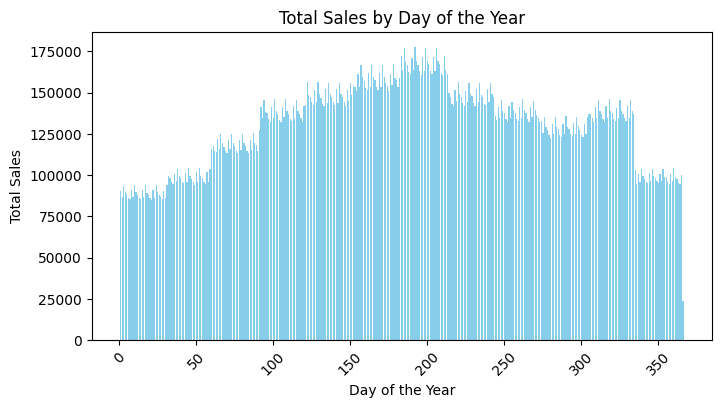

In [37]:
# Extract day of the year and add it as a new column
df['day_of_year'] = df['date'].dt.dayofyear

# Group by day of the year and calculate total sales for each day
sales_by_day_of_year = df.groupby('day_of_year')['sales'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 4))
plt.bar(sales_by_day_of_year['day_of_year'], sales_by_day_of_year['sales'], color='skyblue')
plt.title('Total Sales by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

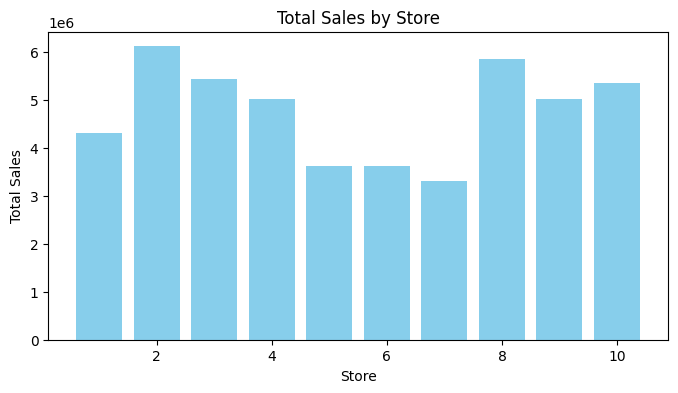

In [34]:
# Group by 'store' and calculate total sales for each store
sales_by_store = df.groupby('store')['sales'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 4))
plt.bar(sales_by_store['store'], sales_by_store['sales'], color='skyblue')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

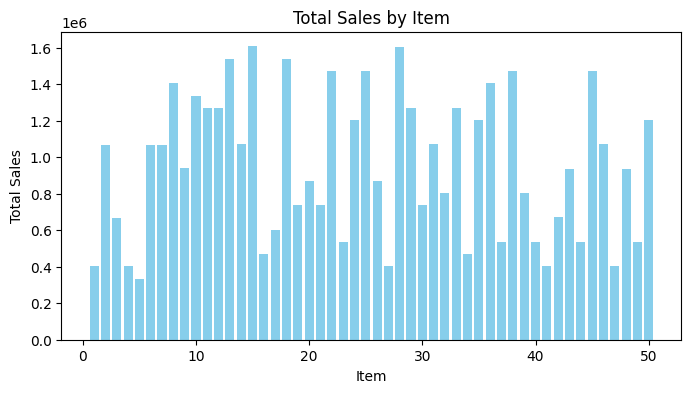

In [35]:
# Group by 'item' and calculate total sales for each item
sales_by_item = df.groupby('item')['sales'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 4))
plt.bar(sales_by_item['item'], sales_by_item['sales'], color='skyblue')
plt.title('Total Sales by Item')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.show()

In [9]:
df['store'].value_counts()

store
1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: count, dtype: int64

In [13]:
df_store1 = df[df['store']==1]
df_store1_item1 = df_store1[df_store1['item']==1]
df_store1_item2 = df_store1[df_store1['item']==2]

df_store1_item1

,date,store,item,sales,day,month,year,weekday
0,2013-01-01,1,1,13,1,1,2013,Tuesday
1,2013-01-02,1,1,11,2,1,2013,Wednesday
2,2013-01-03,1,1,14,3,1,2013,Thursday
3,2013-01-04,1,1,13,4,1,2013,Friday
4,2013-01-05,1,1,10,5,1,2013,Saturday
...,...,...,...,...,...,...,...,...
1821,2017-12-27,1,1,14,27,12,2017,Wednesday
1822,2017-12-28,1,1,19,28,12,2017,Thursday
1823,2017-12-29,1,1,15,29,12,2017,Friday
1824,2017-12-30,1,1,27,30,12,2017,Saturday


In [29]:
# for item in df['item'].unique():
#     df_plot = df[df['item']==item]
#     # Extract day of the year and add it as a new column
#     df_plot['day_of_year'] = df_plot['date'].dt.dayofyear

#     # Group by day of the year and calculate total sales for each day
#     sales_by_day_of_year = df_plot.groupby('day_of_year')['sales'].sum().reset_index()

#     # Plot the bar chart
#     plt.figure(figsize=(8, 4))
#     plt.bar(sales_by_day_of_year['day_of_year'], sales_by_day_of_year['sales'], color='skyblue')
#     plt.title('Total Sales by Day of the Year')
#     plt.xlabel('Day of the Year')
#     plt.ylabel('Total Sales')
#     plt.xticks(rotation=45)
#     plt.show()

In [25]:
df_store1_item1['sales'].describe()

count    1826.000000
mean       19.971522
std         6.741022
min         4.000000
25%        15.000000
50%        19.000000
75%        24.000000
max        50.000000
Name: sales, dtype: float64

In [14]:
df_store1_item1_week = df_store1_item1.resample('W-Mon', on='date')['sales'].sum().reset_index()
df_store1_item1_week

,date,sales
0,2013-01-07,83
1,2013-01-14,68
2,2013-01-21,76
3,2013-01-28,73
4,2013-02-04,89
...,...,...
256,2017-12-04,130
257,2017-12-11,139
258,2017-12-18,116
259,2017-12-25,91


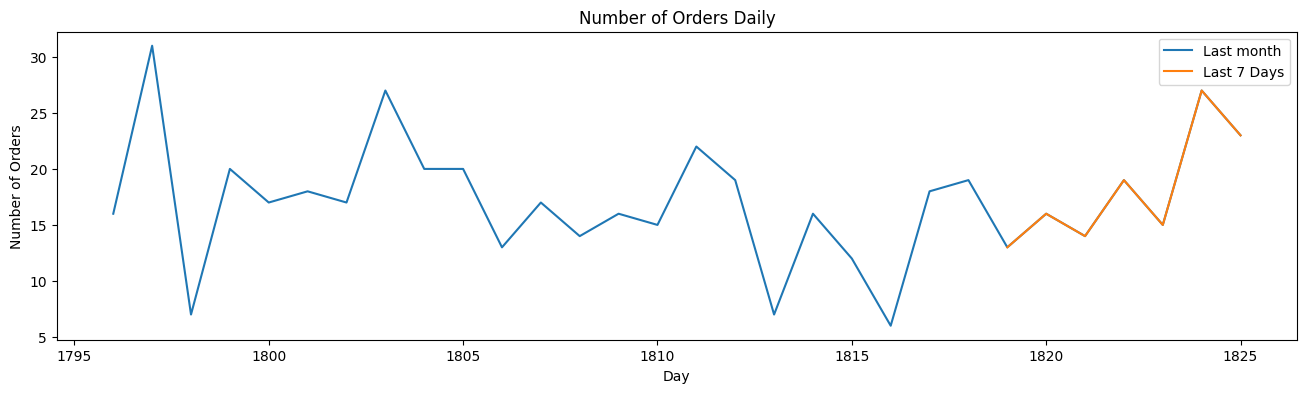

In [55]:
df_store1_item1['sales'][-30:].plot(figsize=(16,4),legend=True)
df_store1_item1['sales'][-7:].plot(figsize=(16,4),legend=True)

plt.xlabel('Day') 
plt.ylabel('Number of Orders')

plt.legend(['Last month','Last 7 Days'])
plt.title('Number of Orders Daily')
plt.show()

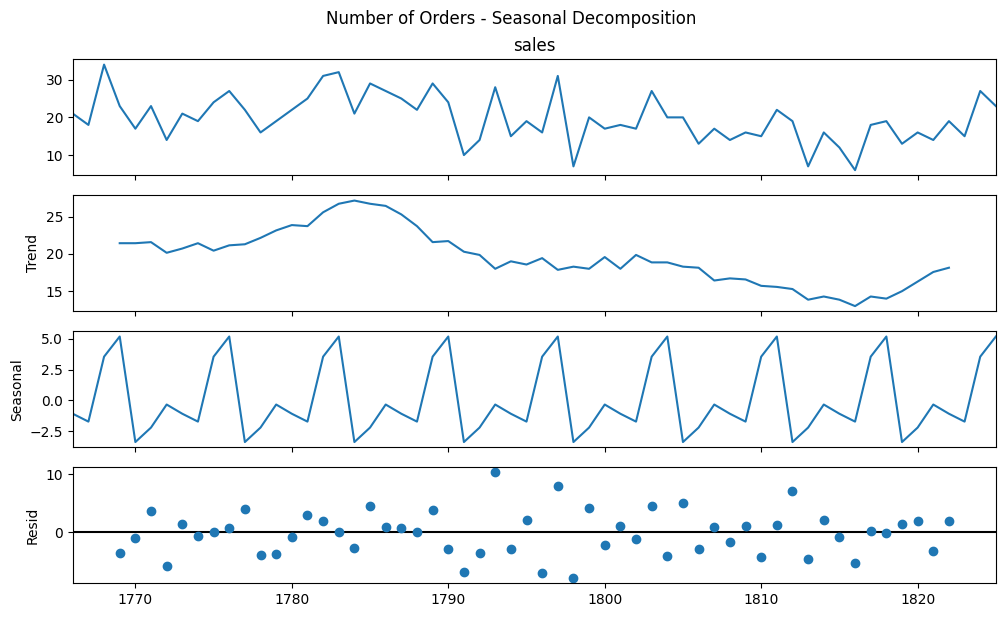

In [56]:
# Set figure size using rcParams
rcParams['figure.figsize'] = 10, 6

# Seasonal decomposition using statsmodels
decomposed_volume = sm.tsa.seasonal_decompose(df_store1_item1[-60:]["sales"], period=7)  # The frequency is set to 24 hours

# Plot the decomposition components
figure = decomposed_volume.plot()
figure.suptitle('Number of Orders - Seasonal Decomposition', y=1.02) 
plt.show()

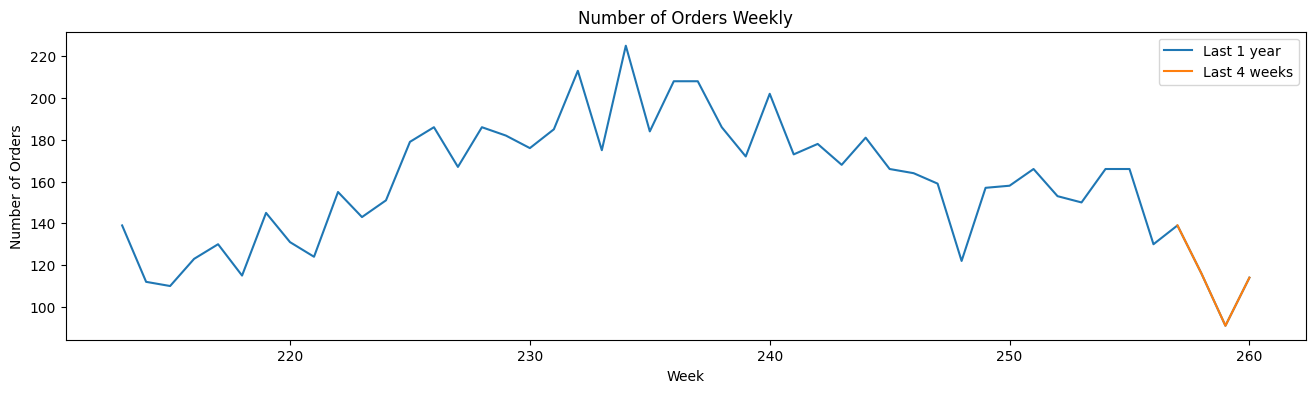

In [65]:
df_store1_item1_week['sales'][-48:].plot(figsize=(16,4),legend=True)
df_store1_item1_week['sales'][-4:].plot(figsize=(16,4),legend=True)

plt.xlabel('Week') 
plt.ylabel('Number of Orders')

plt.legend(['Last 1 year','Last 4 weeks'])
plt.title('Number of Orders Weekly')
plt.show()

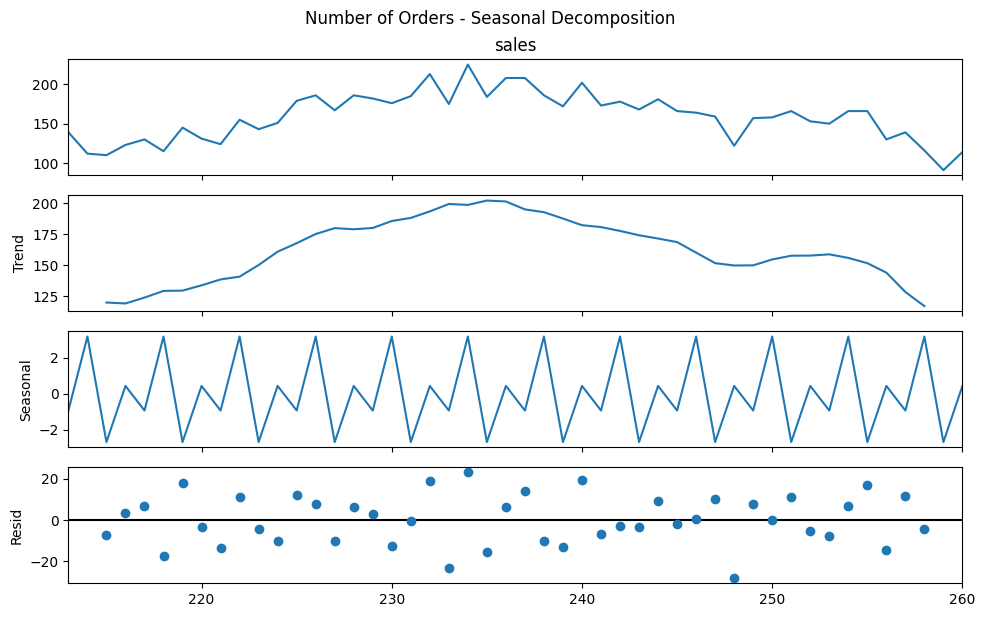

In [54]:
# Set figure size using rcParams
rcParams['figure.figsize'] = 10, 6

# Seasonal decomposition using statsmodels
decomposed_volume = sm.tsa.seasonal_decompose(df_store1_item1_week[-48:]["sales"], period=4)  # The frequency is set to 24 hours

# Plot the decomposition components
figure = decomposed_volume.plot()
figure.suptitle('Number of Orders - Seasonal Decomposition', y=1.02) 
plt.show()

In [60]:
df_store1_item1_month = df_store1_item1.groupby(['year', 'month'])['sales'].sum().reset_index()
df_store1_item1_month.head()

,year,month,sales
0,2013,1,328
1,2013,2,322
2,2013,3,477
3,2013,4,522
4,2013,5,531


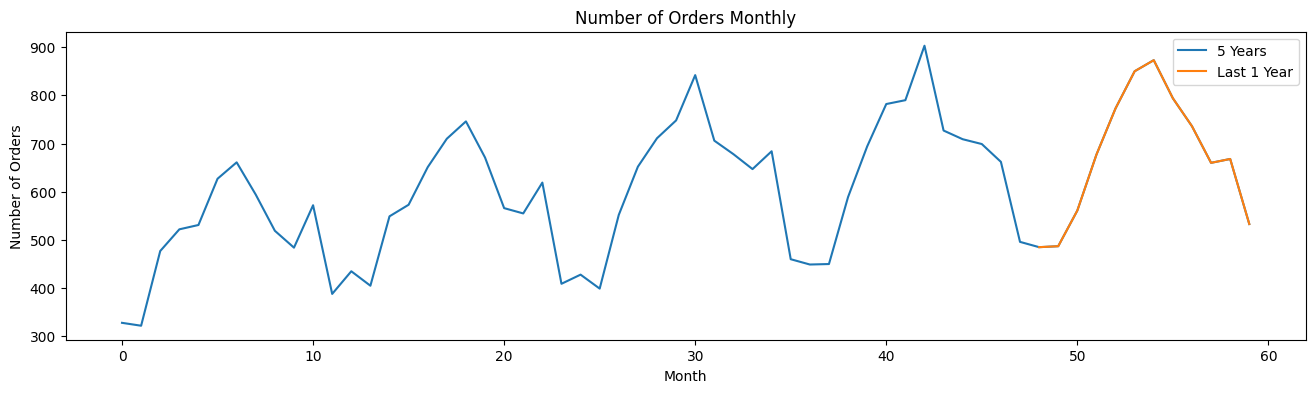

In [66]:
df_store1_item1_month['sales'].plot(figsize=(16,4),legend=True)
df_store1_item1_month['sales'][-12:].plot(figsize=(16,4),legend=True)

plt.xlabel('Month') 
plt.ylabel('Number of Orders')

plt.legend(['5 Years','Last 1 Year'])
plt.title('Number of Orders Monthly')
plt.show()

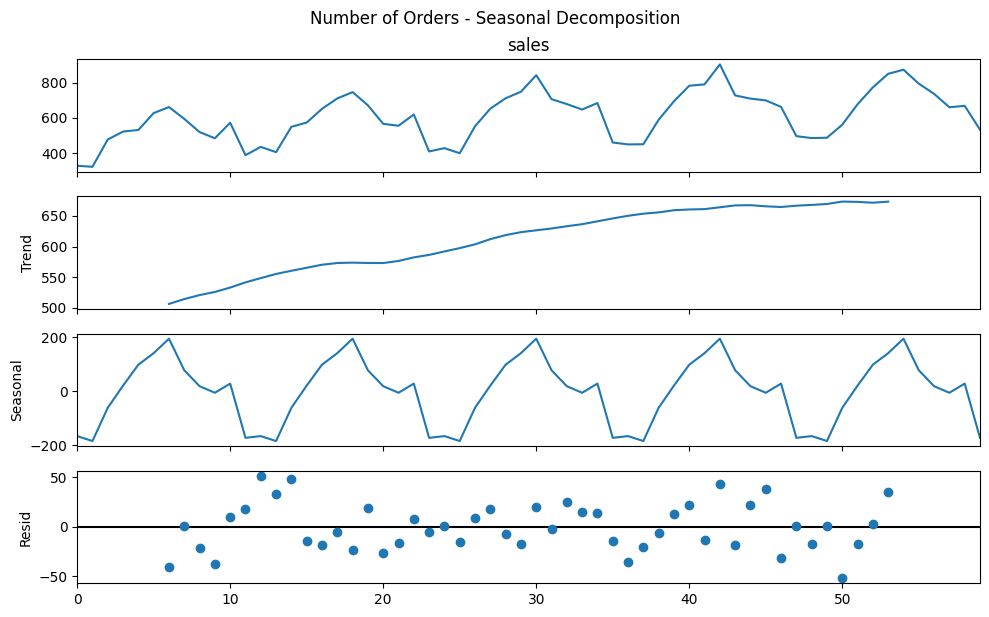

In [64]:
# Set figure size using rcParams
rcParams['figure.figsize'] = 10, 6

# Seasonal decomposition using statsmodels
decomposed_volume = sm.tsa.seasonal_decompose(df_store1_item1_month["sales"], period=12)  # The frequency is set to 24 hours

# Plot the decomposition components
figure = decomposed_volume.plot()
figure.suptitle('Number of Orders - Seasonal Decomposition', y=1.02) 
plt.show()